In [84]:
import numpy as np
import pandas as pd
import chart_studio
import chart_studio.plotly as csp
import chart_studio.tools as cst
import statsmodels.api as sm
from scipy.stats import norm 
from config import *

In [85]:
chart_studio.tools.set_credentials_file(username=USERNAME, api_key=API_KEY)

In [86]:
win_df = pd.read_csv('../data/processed/wl_results.csv')
driver_df = pd.read_csv('../data/processed/driver.csv')

In [87]:
master_df = win_df.merge(driver_df, on = 'driverId', how = 'left')
master_df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,Win or Lost,Unnamed: 0,driverRef,number_y,code,dob,nationality,full name
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,win,0,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,lost,1,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,lost,2,rosberg,6,ROS,1985-06-27,German,Nico Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,lost,3,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,lost,4,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24855,24861,1042,825,210,20,19,16,16,16,0.0,...,205.632,11,lost,824,kevin_magnussen,20,MAG,1992-10-05,Danish,Kevin Magnussen
24856,24862,1042,154,210,8,18,17,17,17,0.0,...,205.118,11,lost,153,grosjean,8,GRO,1986-04-17,French,Romain Grosjean
24857,24863,1042,849,3,6,20,18,18,18,0.0,...,204.629,12,lost,847,latifi,6,LAT,1995-06-29,Canadian,Nicholas Latifi
24858,24864,1042,826,213,26,13,19,19,19,0.0,...,208.216,12,lost,825,kvyat,26,KVY,1994-04-26,Russian,Daniil Kvyat


In [88]:
master_df.rename(columns = {'fastestLapSpeed':'Fastest Lap Speed', 'fastestLap':'Fastest Lap', 'fastestLapTime': 'Fastest Lap Time', 'points':'Points', 
                              'rank':'Rank', 'position': 'Position', 'full name': 'Full Name', 'nationality': 'Nationality', 'grid': 'Grid', 'dob': 'D.O.B', 'milliseconds': 'Milliseconds', 'Win or Lost': 'Win or Loss'}, inplace = True) 

In [89]:
master_df.drop(columns=['resultId', 'constructorId', 'number_x', 'number_y', 'positionText', 'positionOrder', 'Unnamed: 0', 'driverRef', 'time'], inplace=True)



In [90]:
master_df.to_csv('../data/processed/driver_scores.csv')

In [91]:
rank_winners_2020 = ['Lewis Hamilton', 'Valtteri Bottas', 'Max Verstappen', 'Sergio Pérez', 'Charles Leclerc', 'Daniel Ricciardo', 'Carlos Sainz', 'Alexander Albon', 'Lando Norris', 'Pierre Gasly']
def name_check(stringy):
    return stringy in rank_winners_2020

In [92]:
rank_master_2020 = master_df[master_df['Full Name'].map(name_check)]
rank_master_2020['Full Name']

0          Lewis Hamilton
26         Lewis Hamilton
56         Lewis Hamilton
68         Lewis Hamilton
89         Lewis Hamilton
               ...       
24845        Carlos Sainz
24846        Sergio Pérez
24848    Daniel Ricciardo
24851     Alexander Albon
24852        Lando Norris
Name: Full Name, Length: 1192, dtype: object

In [93]:
rank_master_2020 = rank_master_2020.replace({'Position': '\\N'}, 0)

In [94]:
s = rank_master_2020.groupby('Full Name')['Win or Loss']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
# percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percent100 = s.value_counts(normalize=True).mul(100).round(1)
rank_ratio = pd.DataFrame({'Total Races': counts, 'W/L Ratio': percent, 'W/L Percent': percent100})
rank_ratio.reset_index(inplace= True)
rank_ratio

,Full Name,Win or Loss,Total Races,W/L Ratio,W/L Percent
0,Alexander Albon,lost,33,1.000000,100.0
1,Carlos Sainz,lost,114,1.000000,100.0
2,Charles Leclerc,lost,52,0.962963,96.3
3,Charles Leclerc,win,2,0.037037,3.7
4,Daniel Ricciardo,lost,176,0.961749,96.2
5,Daniel Ricciardo,win,7,0.038251,3.8
6,Lando Norris,lost,33,1.000000,100.0
7,Lewis Hamilton,lost,170,0.648855,64.9
8,Lewis Hamilton,win,92,0.351145,35.1
9,Max Verstappen,lost,105,0.921053,92.1


In [95]:
rank_ratio.to_csv('../data/processed/win_ratio.csv')

In [96]:
rank_master_2020.columns

Index(['raceId', 'driverId', 'Grid', 'Position', 'Points', 'laps',
       'Milliseconds', 'Fastest Lap', 'Rank', 'Fastest Lap Time',
       'Fastest Lap Speed', 'statusId', 'Win or Loss', 'code', 'D.O.B',
       'Nationality', 'Full Name'],
      dtype='object')

In [97]:
master_df = rank_master_2020[['Full Name', 'Fastest Lap Time', 'Fastest Lap Speed', 'Fastest Lap', 'Milliseconds', 'Points', 'Position', 'Rank', 'Grid']]
master_df

,Full Name,Fastest Lap Time,Fastest Lap Speed,Fastest Lap,Milliseconds,Points,Position,Rank,Grid
0,Lewis Hamilton,87.452,218.300,39,5690.616,10.0,1,2,1
26,Lewis Hamilton,95.462,209.033,53,5525.103,4.0,5,3,9
56,Lewis Hamilton,95.520,203.969,25,0.000,0.0,13,19,3
68,Lewis Hamilton,82.017,204.323,20,5903.238,6.0,3,3,5
89,Lewis Hamilton,86.529,222.085,31,5213.230,8.0,2,2,3
...,...,...,...,...,...,...,...,...,...
24845,Carlos Sainz,80.268,208.685,65,0.000,8.0,6,6,7
24846,Sergio Pérez,80.802,207.306,49,0.000,6.0,7,11,5
24848,Daniel Ricciardo,80.906,207.040,61,0.000,2.0,9,14,10
24851,Alexander Albon,79.890,209.673,61,0.000,0.0,12,5,6


In [98]:
master_df.to_csv('../data/processed/top10_stats.csv')

In [99]:
score_df = rank_master_2020[['Full Name', 'Fastest Lap Time', 'Fastest Lap Speed', 'Fastest Lap', 'Milliseconds', 'Points']]
driver_avg_df = score_df.groupby('Full Name').mean()
driver_avg_df.reset_index(inplace = True)
driver_avg_df

,Full Name,Fastest Lap Time,Fastest Lap Speed,Fastest Lap,Milliseconds,Points
0,Alexander Albon,87.662303,214.058455,48.030303,3817.781303,4.727273
1,Carlos Sainz,84.740167,188.966746,41.035088,2280.410930,2.859649
2,Charles Leclerc,85.467019,202.433019,43.259259,3315.040333,7.000000
3,Daniel Ricciardo,90.965011,199.633481,45.360656,3543.729415,6.120219
4,Lando Norris,88.388000,212.342030,45.272727,2643.597576,3.454545
5,Lewis Hamilton,89.571771,201.224538,43.332061,5012.072702,14.072519
6,Max Verstappen,85.783746,195.509430,43.035088,4163.534623,9.736842
7,Pierre Gasly,84.602356,198.936186,45.915254,2213.504627,3.169492
8,Sergio Pérez,89.168782,195.017867,44.132979,3017.969436,3.484043
9,Valtteri Bottas,90.828822,203.473487,47.019737,4542.736322,9.657895


In [100]:
driver_avg_df.to_csv('../data/processed/avg_driver_stats.csv')

This is delivered through the Fastest Driver insight, which produces a dataset ranking based on speed (Average Lap Times) 
of all drivers from the present day back to 1983, 
by simply ranking drivers in descending order of Driver, Rank (integer), Gap to Best (milliseconds).

<div class="alert alert-block alert-success">
    <b>Position:</b> Points are awarded to drivers and teams based on where they finish in a race. The winner receives 25 points, the second-place finisher 18 points, with 15, 12, 10, 8, 6, 4, 2 and 1 points for positions 3 through 10.
    </div>

In [101]:
import plotly.express as px
fig = px.scatter(master_df, x="Fastest Lap Time", y="Position", animation_frame="Points", animation_group="Full Name",
           size="Fastest Lap Time", color="Full Name", template="seaborn", hover_name="Full Name",
           log_x=True, size_max=65, range_x=[75, 100], range_y=[-5, 15])
csp.plot(fig , filename = 'End Position and Points', auto_open=True)

'https://plotly.com/~dgustave/2/'

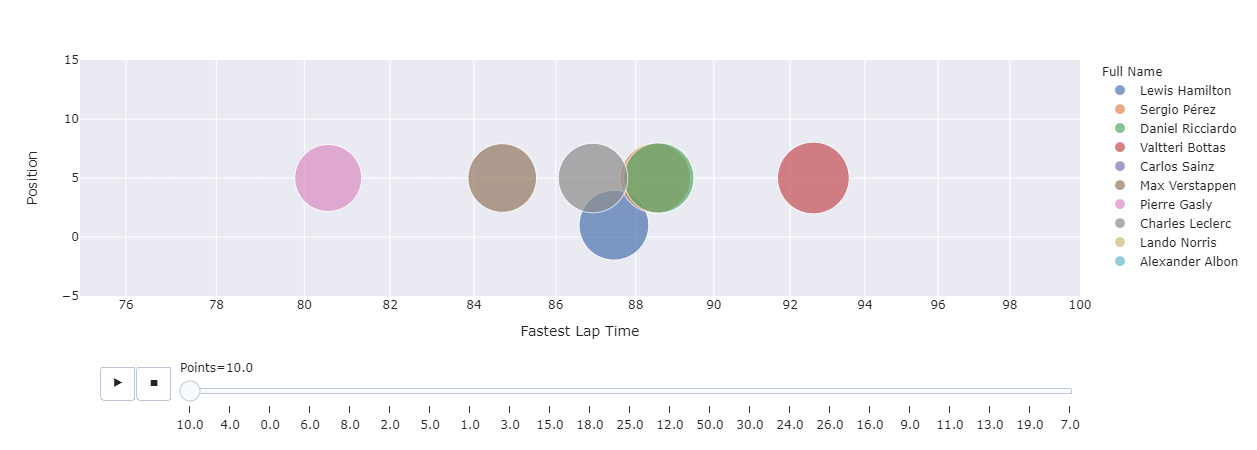

In [103]:
fig.show()

In [102]:
master_df.loc[:,('Position')] = pd.to_numeric(master_df['Position'])

C:\Users\Donley\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
master_df['Position'].value_counts()

0     168
1     120
3      96
2      95
5      94
4      84
8      69
6      67
7      67
9      61
10     54
11     54
12     37
13     35
14     26
15     22
16     16
17      9
18      8
19      7
20      2
22      1
Name: Position, dtype: int64

In [105]:
position_df = master_df[~(master_df['Position'] >= 10)]  
position_df

,Full Name,Fastest Lap Time,Fastest Lap Speed,Fastest Lap,Milliseconds,Points,Position,Rank,Grid
0,Lewis Hamilton,87.452,218.300,39,5690.616,10.0,1,2,1
26,Lewis Hamilton,95.462,209.033,53,5525.103,4.0,5,3,9
68,Lewis Hamilton,82.017,204.323,20,5903.238,6.0,3,3,5
89,Lewis Hamilton,86.529,222.085,31,5213.230,8.0,2,2,3
108,Lewis Hamilton,78.510,153.152,71,7242.742,10.0,1,6,3
...,...,...,...,...,...,...,...,...,...
24843,Charles Leclerc,80.408,208.322,66,5462.140,12.0,4,7,4
24844,Pierre Gasly,80.551,207.952,65,0.000,10.0,5,9,9
24845,Carlos Sainz,80.268,208.685,65,0.000,8.0,6,6,7
24846,Sergio Pérez,80.802,207.306,49,0.000,6.0,7,11,5


In [106]:
names = ['Lewis Hamilton', 'Valtteri Bottas', 'Max Verstappen', 'Sergio Pérez', 'Charles Leclerc', 'Daniel Ricciardo', 'Carlos Sainz', 'Alexander Albon', 'Lando Norris', 'Pierre Gasly']
for names in position_df['Full Name']:
     sort_df= position_df.sort_values(by=['Fastest Lap Time'], ascending=True)
sort_df

,Full Name,Fastest Lap Time,Fastest Lap Speed,Fastest Lap,Milliseconds,Points,Position,Rank,Grid
22257,Sergio Pérez,0.000,0.000,0,0.000,0.0,0,0,10
23472,Max Verstappen,0.000,0.000,0,0.000,0.0,0,0,5
22890,Carlos Sainz,0.000,0.000,0,0.000,0.0,0,0,10
22148,Daniel Ricciardo,0.000,0.000,0,5603.235,0.0,0,0,2
22494,Sergio Pérez,0.000,0.000,0,0.000,0.0,0,0,11
...,...,...,...,...,...,...,...,...,...
20322,Lewis Hamilton,119.560,189.665,42,5983.578,15.0,3,4,4
21057,Daniel Ricciardo,119.831,210.416,10,0.000,0.0,0,23,23
24797,Carlos Sainz,134.103,140.802,5,0.000,0.0,0,18,9
22707,Max Verstappen,140.776,150.647,3,0.000,0.0,0,16,13


In [107]:
sort_df.to_csv('../data/processed/sorted_laptimes.csv')

<div class="alert alert-block alert-success">
    <b>Bonus Points Awarded:</b> if a driver in the top ten scores the fastest lap then they score an additional point. Previously, points have been awarded to just the top five and the setter of the fastest lap; then to the top six finishers; then the top eight finishers before the current system was introduced in 2010. In 2014, double points were awarded at the final race of the season.
    </div>

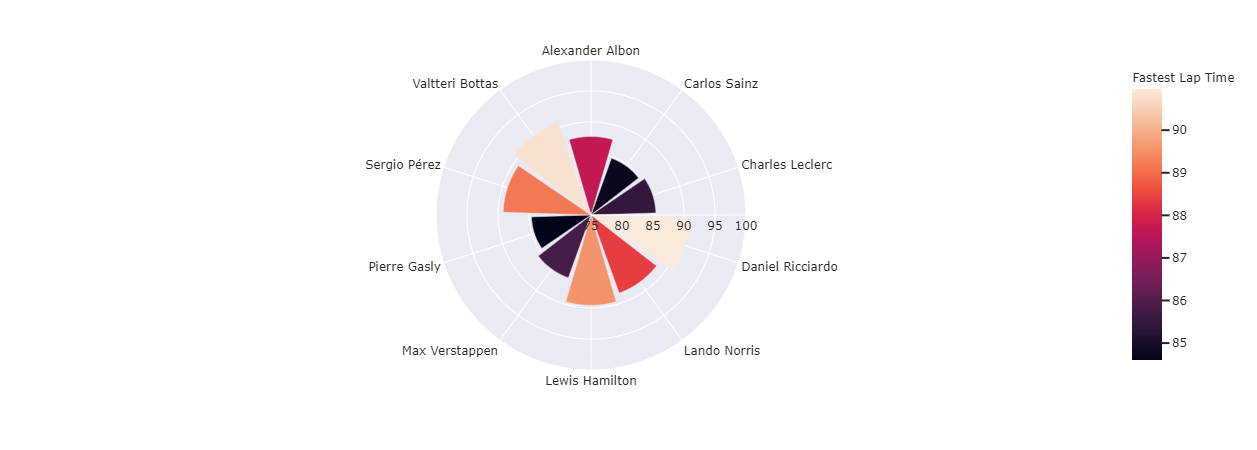

'https://plotly.com/~dgustave/4/'

In [108]:
fig1 = px.bar_polar(driver_avg_df, r="Fastest Lap Time", range_r= [75, 100], theta="Full Name", color="Fastest Lap Time", template="seaborn",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig1.show()
csp.plot(fig1, filename = 'Awarding Bonus Points', auto_open=True)

<div class="alert alert-block alert-warning">
    <b>Most Likely To Recieve Bonus Points on Average:</b> Pierre Gasly on average is mostly likely to recieve bonus points being in the top 10. 
    </div>

In [109]:
winners = rank_ratio.loc[rank_ratio['Win or Loss'] == "win"]

In [110]:
winners

,Full Name,Win or Loss,Total Races,W/L Ratio,W/L Percent
3,Charles Leclerc,win,2,0.037037,3.7
5,Daniel Ricciardo,win,7,0.038251,3.8
8,Lewis Hamilton,win,92,0.351145,35.1
10,Max Verstappen,win,9,0.078947,7.9
12,Pierre Gasly,win,1,0.016949,1.7
15,Valtteri Bottas,win,9,0.059211,5.9


In [111]:
rank_ratio

,Full Name,Win or Loss,Total Races,W/L Ratio,W/L Percent
0,Alexander Albon,lost,33,1.000000,100.0
1,Carlos Sainz,lost,114,1.000000,100.0
2,Charles Leclerc,lost,52,0.962963,96.3
3,Charles Leclerc,win,2,0.037037,3.7
4,Daniel Ricciardo,lost,176,0.961749,96.2
5,Daniel Ricciardo,win,7,0.038251,3.8
6,Lando Norris,lost,33,1.000000,100.0
7,Lewis Hamilton,lost,170,0.648855,64.9
8,Lewis Hamilton,win,92,0.351145,35.1
9,Max Verstappen,lost,105,0.921053,92.1


<div class="alert alert-block alert-warning">
    <b>Most Likely To Win on Average:</b> Lewis on average is mostly likely to win being in the top 10 because over all he wins more races by lap time and also a longer career. 
    </div>

In [112]:
fig3 = px.scatter_3d(rank_ratio, x="Total Races", y="W/L Percent", z="W/L Ratio", color="Full Name", size="W/L Percent", hover_name="Full Name",
                  symbol="Win or Loss", template="seaborn", color_discrete_map = {"W/L Percent": "red", "W/L Ratio": "purple", "Total Races":"blue"})
fig3.show()
csp.plot(fig3, filename = 'Win and Loss Percentages', auto_open=True)

'https://plotly.com/~dgustave/7/'

<div class="alert alert-block alert-danger">
    <b>Formula 1 Ranking Method:</b> An algorithm called the Massey’s method (a form of linear regression) is one of the core models behind the Insight. Fastest Driver uses Massey’s method to rank drivers by solving for a set of linear equations, where each driver’s rating is calculated as their average lap time difference against teammates. Additionally, when comparing ratings of teammates, the model uses features like driver strength of schedule normalized by the number of interactions with the driver. Overall, the model places high rankings to drivers who perform extraordinarily well against their teammates or perform well against strong opponents. https://aws.amazon.com/blogs/machine-learning/the-fastest-driver-in-formula-1/
</div>


In [ ]:
# delta_df = pd.read_csv('../data/processed/rank_results.csv')
# delta_df

In [ ]:
# delta_df['Driver 1'] = delta_df['number']
# delta_df['Driver 1 Average Lap Time'] = delta_df['Average Lap Time']
# delta_df.rename(columns = {'number':'Driver 2'}, inplace = True)
# delta_df.rename(columns = {'Average Lap Time':'Driver 2 Average Lap Time'}, inplace = True)
# delta_df

In [ ]:
# matrix_df = delta_df.loc[:,['Driver 1', 'Driver 1 Average Lap Time', 'Driver 2', 'Driver 2 Average Lap Time']]
# matrix_df

In [80]:
# #example data comparing five drivers
data = pd.DataFrame([[1, 0, 85, 90], 
                    [2, 1, 90, 85],
                    [3, 2, 91, 90],
                    [4, 6, 85, 91],                    
                    [5, 4, 86, 91],
                    [6, 5, 85, 86],
                    [7, 3, 91, 85],
                    [8, 7, 88, 85],
                    [9, 8, 86, 88],
                    [0, 9, 90, 88]], columns=['Driver1', 'Driver2', 'Driver1_laptime', 'Driver2_laptime'])
                           

In [81]:
# master_df[master_df['driverId'] == 1]
# iterate through every other race. 
# 1 for loop for driver and nest driver 2
# unique list of driver and race id
# outer loop race id
# inner loop 

# when race id = that driver is

# race_l = #unique race id for each race in df
# driver_l = #unique driver id for each drier in df
# driver_d = {'d1':0, 'd2':0}

# for r in race_l:
#     for d1 in driver_l:
#         result = 0
#         for d2 in driver_l:
#             temp = df.loc[df[raceid]==r]&&df[driverid]=d1] - df.loc[df[raceid]==r]&&df[driverid]=d2]
#             result = result + temp
#         driver_d[d1] = driver_d[d1] + result
            

In [82]:
def init_linear_regressor_matrix(data, num_of_drivers, col_to_rank):
    
    """initialize linear system matrix for regression"""
    wins = np.zeros((data.shape[0], num_of_drivers))
    score_diff = np.zeros(data.shape[0])

    for index, row in data.iterrows():
        idx1 = row["Driver1"]
        idx2 = row["Driver2"]
        if row['Driver1_laptime'] - row['Driver2_laptime'] > 0:
            wins[(index)][(idx1)] = -1
            wins[(index)][(idx2)] = 1
            score_diff[(index)] = row['Driver1_laptime'] - row['Driver2_laptime']
        else:
            wins[(index)][(idx1)] = 1
        wins[(index)][(idx2)] = -1
        score_diff[(index)] = row['Driver2_laptime'] - row['Driver1_laptime']
    wins_df = pd.DataFrame(wins)
    wins_df[col_to_rank] = score_diff
    return wins_df 

def massey(data, num_of_drivers, col_to_rank='delta'):
    """Compute for each driver, adjacency matrix and aggregated scores, as input to the Massey Model"""

    wins_df = init_linear_regressor_matrix(data, num_of_drivers, col_to_rank)
    model = sm.OLS(
           wins_df[col_to_rank], wins_df.drop(columns=[col_to_rank])
       )
    results = model.fit(cov_type='HC1')
    rankings = pd.DataFrame(results.params)
    rankings['std'] = np.sqrt(np.diag(results.cov_params()))
    rankings['consistency'] = (norm.ppf(0.9)-norm.ppf(0.1))*rankings['std']
    rankings = (
         rankings
         .sort_values(by=0, ascending=False)
         .reset_index()
         .rename(columns={"index": "Driver", 0: "massey"})
     )
    rankings = rankings.sort_values(by=["massey"], ascending=False)
    rankings["massey_new"] = rankings["massey"].max() - rankings["massey"]
    return rankings[['Driver', 'massey_new']]

rankings = massey(data, 10)
print(rankings)


   Driver  massey_new
0       1    0.000000
1       7    2.000000
2       3    4.000000
3       5    4.666667
4       9    5.000000
5       0    5.000000
6       4    5.666667
7       8    7.000000
8       2    7.000000
9       6    7.666667


In [ ]:
# import plotly.express as px
# fig = px.scatter(driver_avg_df, x="fastestLapTime", y="fastestLap", color="full name", marginal_y="violin",
#            marginal_x="box", trendline="ols", template="simple_white")
# fig.show()
# fig = px.scatter(master_df, x="fastestLapTime", y="fastestLap", color="full name", trendline="ols")
# fig.show()

# results = px.get_trendline_results(fig)
# print(results)

# # results.query("sex == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()